Tasks
1. Encode categorical data vals
2. Feature Selection
3. Employ classification models
4. Choose best model

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('final_data.csv')

In [ ]:
data.shape

(49161, 99)

In [ ]:
data.head()

,Second_pokemon,First_pokemon,Winner,Legendary,name,generation,status,species,type_number,type_1,...,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
0,463,3,1,False,Venusaur,1,Normal,Seed Pokémon,2,Grass,...,0.0,2.0,1.0,0.5,4.0,1.0,1.0,1.0,1.0,1.0
1,471,6,0,False,Charmeleon,1,Normal,Flame Pokémon,1,Fire,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
2,471,8,1,False,Mega Charizard X,1,Normal,Flame Pokémon,2,Fire,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
3,496,9,1,False,Mega Charizard Y,1,Normal,Flame Pokémon,2,Fire,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,148,9,1,False,Mega Charizard Y,1,Normal,Flame Pokémon,2,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
data.columns

Index(['Second_pokemon', 'First_pokemon', 'Winner', 'Legendary', 'name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy', 'Legendary_2', 'name_2', 'generation_2', 'status_2',
       'species_2', 'type_number_2', 'type_1_2', 'type_2_2', 'height_m_2',
       'weight_kg_2', 'abili

In [ ]:
data.shape

(49161, 99)

In [ ]:
battles=data[['First_pokemon', 'Second_pokemon', 'Winner']].copy()

In [ ]:
battles.head()

,First_pokemon,Second_pokemon,Winner
0,3,463,1
1,6,471,0
2,8,471,1
3,9,496,1
4,9,148,1


In [ ]:
tdata=data.drop(columns=["First_pokemon","Second_pokemon", "name", "name_2"])

In [ ]:
tdata.head()

,Winner,Legendary,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
0,1,False,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,0.0,2.0,1.0,0.5,4.0,1.0,1.0,1.0,1.0,1.0
1,0,False,1,Normal,Flame Pokémon,1,Fire,NaN,1.1,19.0,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
2,1,False,1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
3,1,False,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,1,False,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


## Encoding categorical data variables

In [ ]:
tdata.dtypes

Winner                int64
Legendary              bool
generation            int64
status               object
species              object
                     ...   
against_ghost_2     float64
against_dragon_2    float64
against_dark_2      float64
against_steel_2     float64
against_fairy_2     float64
Length: 95, dtype: object

In [ ]:
tdata.columns.to_series().groupby(tdata.dtypes).groups

{bool: ['Legendary', 'Legendary_2'], int64: ['Winner', 'generation', 'type_number', 'abilities_number', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship', 'base_experience', 'egg_type_number', 'egg_cycles', 'generation_2', 'type_number_2', 'abilities_number_2', 'total_points_2', 'hp_2', 'attack_2', 'defense_2', 'sp_attack_2', 'sp_defense_2', 'speed_2', 'catch_rate_2', 'base_friendship_2', 'base_experience_2', 'egg_type_number_2', 'egg_cycles_2'], float64: ['height_m', 'weight_kg', 'percentage_male', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy', 'height_m_2', 'weight_kg_2', 'percentage_male_2', 'against_normal_2', 'against_fire_2', 'against_water_2', 'against_electric_

In [ ]:
boolcols=[col for col in tdata.columns if tdata[col].dtype=='bool']
objcols=[col for col in tdata.columns if tdata[col].dtype=='object']
intcols=[col for col in tdata.columns if tdata[col].dtype=='int64']
floatcols=[col for col in tdata.columns if tdata[col].dtype=='float64']


In [ ]:
tmp=boolcols+intcols+floatcols


In [ ]:
df=tdata.copy()

In [ ]:
df['Legendary']=df['Legendary'].astype('category')
df['Legendary']=df['Legendary'].cat.codes
df.head()

,Winner,Legendary,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
0,1,0,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,0.0,2.0,1.0,0.5,4.0,1.0,1.0,1.0,1.0,1.0
1,0,0,1,Normal,Flame Pokémon,1,Fire,NaN,1.1,19.0,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
2,1,0,1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
3,1,0,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,1,0,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
df['Legendary_2']=df['Legendary_2'].astype('category')
df['Legendary_2']=df['Legendary_2'].cat.codes
df.head()

,Winner,Legendary,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
0,1,0,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,0.0,2.0,1.0,0.5,4.0,1.0,1.0,1.0,1.0,1.0
1,0,0,1,Normal,Flame Pokémon,1,Fire,NaN,1.1,19.0,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
2,1,0,1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0
3,1,0,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,1,0,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
df=pd.get_dummies(data=df, columns=objcols)

In [ ]:
df.head()

,Winner,Legendary,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,...,egg_type_2_2_Fairy,egg_type_2_2_Field,egg_type_2_2_Flying,egg_type_2_2_Grass,egg_type_2_2_Human-Like,egg_type_2_2_Mineral,egg_type_2_2_Monster,egg_type_2_2_Water 1,egg_type_2_2_Water 2,egg_type_2_2_Water 3
0,1,0,1,2,2.0,100.0,2,525,80,82,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1.1,19.0,2,405,58,64,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,2,1.7,110.5,1,634,78,130,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,2,1.7,100.5,1,634,78,104,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,2,1.7,100.5,1,634,78,104,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns[df.isna().any()].tolist()

['percentage_male', 'percentage_male_2']

In [ ]:
df=df.fillna(0)

In [ ]:
# df.to_csv("encoded_data.csv", index=False)

In [ ]:
y=df['Winner'].copy()
X=df.drop(columns=['Winner'])

In [ ]:
X.shape

(49161, 2028)

## Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test, k_ct):
  fs = SelectKBest(score_func=chi2, k=k_ct)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

In [ ]:
from tabulate import tabulate

headers=['Feature #', 'Model', 'Accuracy']
table=[]

In [ ]:
k_ct=[10, 50, 100, 500, 1000, 1500, 'all']

## Models

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import metrics

def train_model (model, model_name):
  for k in k_ct:
    print("k=", k)
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, k)
    result=[k, model_name]
    model.fit(X_train_fs, y_train)
    y_pred=model.predict(X_test_fs)
    acc=accuracy_score(y_test, y_pred)
    result.append(acc)
    table.append(result)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models=[LogisticRegression(random_state=0, solver='sag'),KNeighborsClassifier(n_neighbors = 5), SVC(), \
        GaussianNB(), DecisionTreeClassifier(criterion = 'entropy', random_state = 0), RandomForestClassifier(max_depth=5, random_state=0)]
model_names=['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']

In [ ]:
for i in range(len(models)):
  print(model_names[i])
  train_model(models[i], model_names[i])
  print("---------------------")

Logistic Regression
k= 10
k= 50


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


k= 100


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


k= 500


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


k= 1000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


k= 1500


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


k= all


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


---------------------
KNN
k= 10
k= 50
k= 100
k= 500
k= 1000
k= 1500
k= all
---------------------
SVM
k= 10
k= 50
k= 100
k= 500
k= 1000
k= 1500
k= all
---------------------
Naive Bayes
k= 10
k= 50
k= 100
k= 500
k= 1000
k= 1500
k= all
---------------------
Decision Tree
k= 10
k= 50
k= 100
k= 500
k= 1000
k= 1500
k= all
---------------------
Random Forest
k= 10
k= 50
k= 100
k= 500
k= 1000
k= 1500
k= all
---------------------


In [ ]:
print(tabulate(table, headers=headers, tablefmt='fancy_grid'))

╒═════════════╤═════════════════════╤════════════╕
│ Feature #   │ Model               │   Accuracy │
╞═════════════╪═════════════════════╪════════════╡
│ 10          │ Logistic Regression │   0.894908 │
├─────────────┼─────────────────────┼────────────┤
│ 50          │ Logistic Regression │   0.885823 │
├─────────────┼─────────────────────┼────────────┤
│ 100         │ Logistic Regression │   0.885348 │
├─────────────┼─────────────────────┼────────────┤
│ 500         │ Logistic Regression │   0.885416 │
├─────────────┼─────────────────────┼────────────┤
│ 1000        │ Logistic Regression │   0.885145 │
├─────────────┼─────────────────────┼────────────┤
│ 1500        │ Logistic Regression │   0.885619 │
├─────────────┼─────────────────────┼────────────┤
│ all         │ Logistic Regression │   0.887111 │
├─────────────┼─────────────────────┼────────────┤
│ 10          │ KNN                 │   0.835582 │
├─────────────┼─────────────────────┼────────────┤
│ 50          │ KNN            

## Best Model - Decision Tree with all features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, k_ct):
  fs = SelectKBest(score_func=chi2, k=k_ct)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  return X_train_fs, fs

In [ ]:
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 11.7 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=236292 sha256=aeff2618fa545633d955d87c3507711506e90a4f777fa4d2749bcc88f0ee8075
  Stored in directory: /root/.cache/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
X_train_fs, fs = select_features(X, y, 'all')
model.fit(X_train_fs, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.5333819703379089, 0.9827586206896551, 'X[12] <= 66.5\nentropy = 0.998\nsamples = 49161\nvalue = [25959, 23202]'),
 Text(0.2477650792505987, 0.9482758620689655, 'X[49] <= 57.5\nentropy = 0.829\nsamples = 25702\nvalue = [18975, 6727]'),
 Text(0.13616364575688517, 0.9137931034482759, 'X[12] <= 45.5\nentropy = 0.99\nsamples = 9974\nvalue = [4387, 5587]'),
 Text(0.06779906524006335, 0.8793103448275862, 'X[49] <= 39.5\nentropy = 0.886\nsamples = 4995\nvalue = [3479, 1516]'),
 Text(0.031417783614662596, 0.8448275862068966, 'X[12] <= 30.5\nentropy = 0.982\nsamples = 2160\nvalue = [911, 1249]'),
 Text(0.016609370775232724, 0.8103448275862069, 'X[49] <= 29.5\nentropy = 0.827\nsamples = 964\nvalue = [713, 251]'),
 Text(0.009115840704546333, 0.7758620689655172, 'X[12] <= 22.5\nentropy = 0.967\nsamples = 378\nvalue = [149, 229]'),
 Text(0.0030901154930665533, 0.7413793103448276, 'X[49] <= 17.5\nentropy = 0.668\nsamples = 126\nvalue = [104, 22]'),
 Text(0.001854069295839932, 0.70689655172413

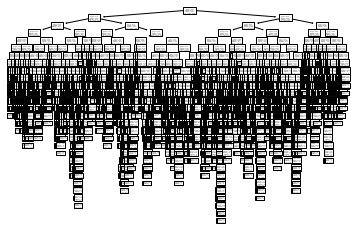

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=0, solver='sag')
# X_train_fs, fs = select_features(X, y, 'all')
# model.fit(X_train_fs, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='sag')

In [ ]:
X_train_fs.shape

(49161, 2028)

In [ ]:
X_train_fs[0]

array([0., 1., 2., ..., 0., 0., 0.])

In [ ]:
import pickle

filename = 'finalized_model2.sav'
pickle.dump(model, open(filename, 'wb'))